In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/240701_kinker_anndata.h5ad')

In [3]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [4]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/qx/ky79g97s1hxbjkrf9b5sshq00000gn/T/ipykernel_8106/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


In [5]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

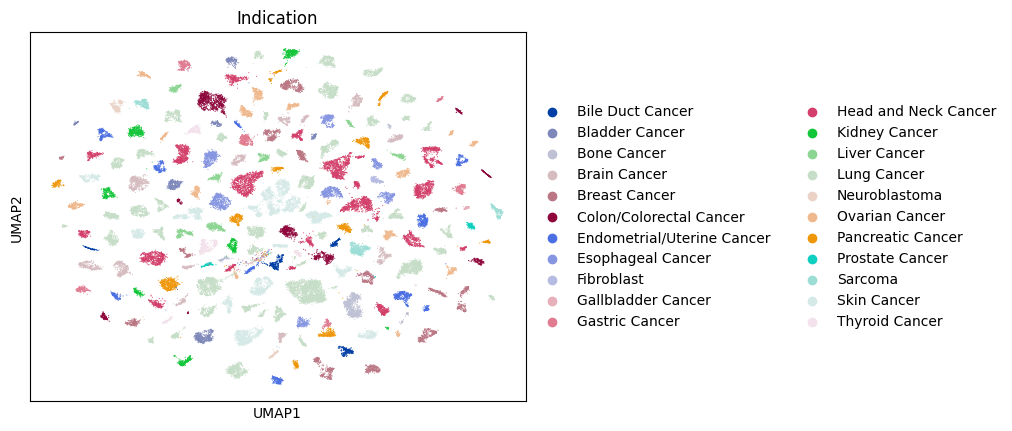

In [6]:
#general cancer indications 
sc.pl.umap(adata, color=['Indication'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

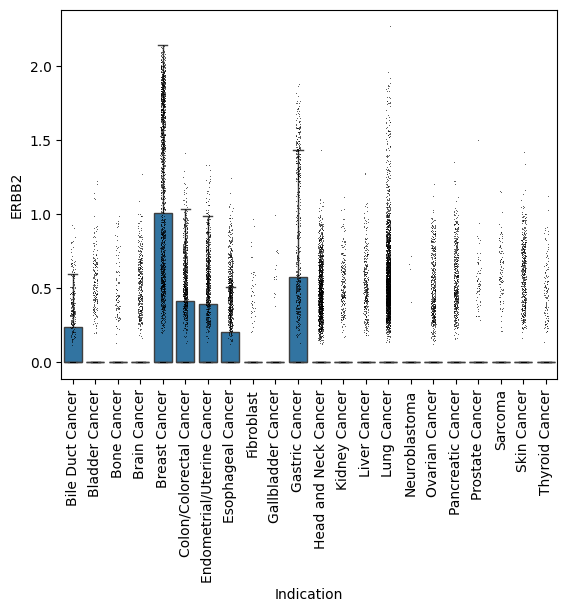

In [7]:
#ERBB2 vs indication 
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='Indication', y='ERBB2', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

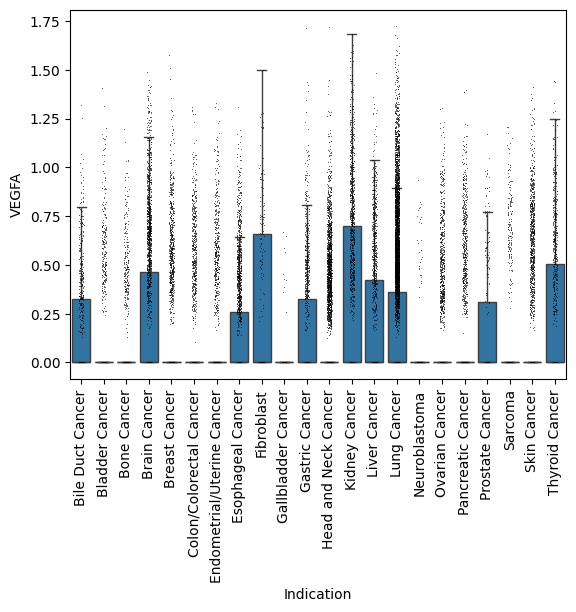

In [8]:
#VEGFA vs indication
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='VEGFA', showfliers=False)
sns.stripplot(data=df, x='Indication', y='VEGFA', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

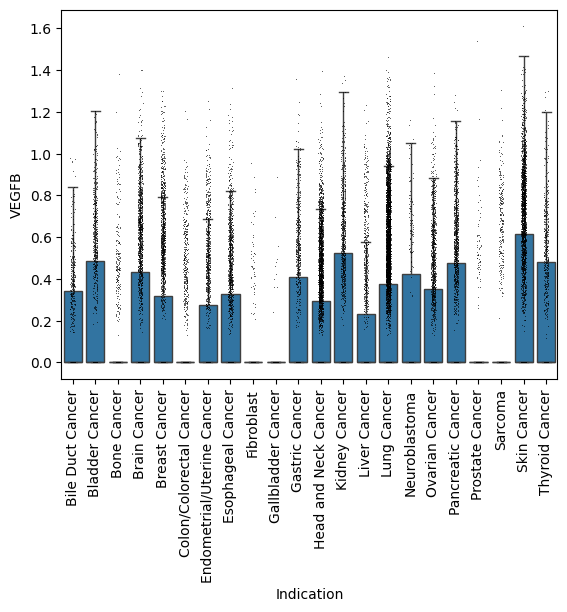

In [9]:
#VEGFB vs indication
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='VEGFB', showfliers=False)
sns.stripplot(data=df, x='Indication', y='VEGFB', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'ABC1_LUNG'),
  Text(1, 0, 'ACCMESO1_PLEURA'),
  Text(2, 0, 'CALU6_LUNG'),
  Text(3, 0, 'EBC1_LUNG'),
  Text(4, 0, 'EKVX_LUNG'),
  Text(5, 0, 'HCC366_LUNG'),
  Text(6, 0, 'IALM_LUNG'),
  Text(7, 0, 'MSTO211H_PLEURA'),
  Text(8, 0, 'NCIH226_LUNG'),
  Text(9, 0, 'NCIH292_LUNG'),
  Text(10, 0, 'NCIH358_LUNG'),
  Text(11, 0, 'NCIH446_LUNG'),
  Text(12, 0, 'NCIH460_LUNG'),
  Text(13, 0, 'NCIH522_LUNG'),
  Text(14, 0, 'NCIH650_LUNG'),
  Text(15, 0, 'NCIH727_LUNG'),
  Text(16, 0, 'NCIH1048_LUNG'),
  Text(17, 0, 'NCIH1299_LUNG'),
  Text(18, 0, 'NCIH1373_LUNG'),
  Text(19, 0, 'NCIH1435_LUNG'),
  Text(20, 0, 'NCIH1568_LUNG'),
  Text(21, 0, 'NCIH1792_LUNG'),
  Text(22, 0, 'NCIH1944_LUNG'),
  Text(23, 0, 'NCIH2073_LUNG'),
  Text(24, 0, 'NCIH2077_LUNG'),
  Te

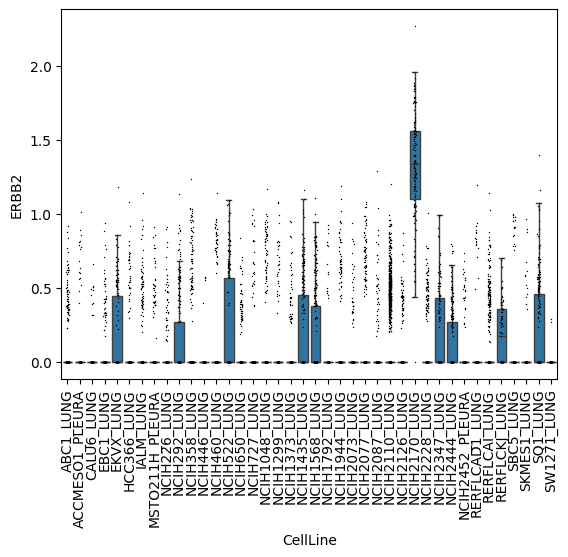

In [10]:
#ERBB2 vs lung cancer cell lines
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

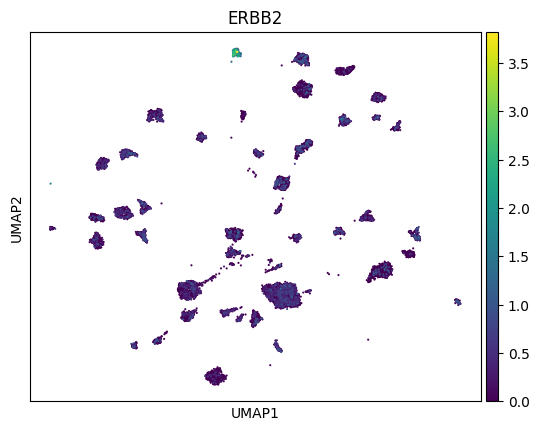

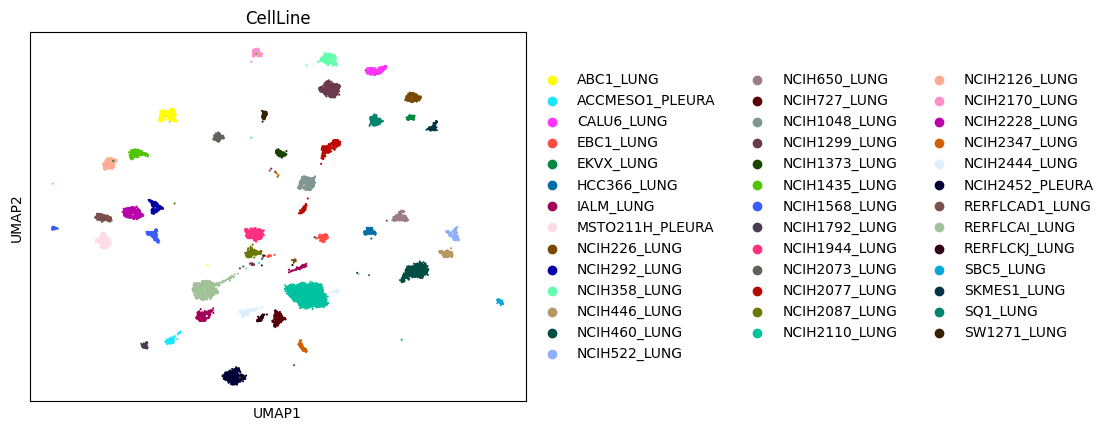

In [11]:
#UMAP visualization of ERBB2 expression in lung cancer cell lines 
sc.pl.umap(adata_lung, color=['ERBB2'])

#UMAP visualization of lung cancer cell lines 
sc.pl.umap(adata_lung, color=['CellLine'])

In [14]:
#stats for ERBB2 expression in NCIH2170_LUNG
import pandas as pd

# Verify that the 'CellLine' values are correct
print(df['CellLine'].unique())

# Filter data for NCIH_2170 and other cell lines
df_target = df[df['CellLine'] == 'NCIH2170_LUNG'].copy()
df_others = df[df['CellLine'] != 'NCIH2170_LUNG'].copy()

# Check sample sizes
print(f"Sample size for NCIH2170_LUNG: {len(df_target)}")
print(f"Sample size for other cell lines: {len(df_others)}")

# Check for NaNs in ERBB2
print(df_target['ERBB2'].isna().sum())
print(df_others['ERBB2'].isna().sum())

# Ensure ERBB2 is numeric
print(df_target['ERBB2'].dtype)
print(df_others['ERBB2'].dtype)

from scipy import stats

# Check sample sizes again
if len(df_target) > 1 and len(df_others) > 1:
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(df_target['ERBB2'], df_others['ERBB2'], equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")
else:
    print("Sample sizes are insufficient for t-test.")


from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform t-test if sample sizes are sufficient
if len(df_target) > 0 and len(df_others) > 0:
    t_stat, p_value = stats.ttest_ind(df_target['ERBB2'], df_others['ERBB2'], equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Perform Mann-Whitney U test as a backup
    u_stat, p_value = stats.mannwhitneyu(df_target['ERBB2'], df_others['ERBB2'])
    print(f"U-statistic: {u_stat}, P-value: {p_value}")
else:
    print("Sample sizes are insufficient for statistical testing.")

# Perform one-way ANOVA
grouped_data = [df[df['CellLine'] == cell_line]['ERBB2'].dropna() for cell_line in df['CellLine'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant differences exist between the cell lines.")

    # Perform Tukey's HSD post-hoc test
    print("\nTukey's HSD Test:")
    tukey_result = pairwise_tukeyhsd(endog=df['ERBB2'], groups=df['CellLine'], alpha=0.05)
    print(tukey_result)

    # Specifically check for the difference involving 'NCIH2170_LUNG'
    print("\nTukey's HSD for 'NCIH2170_LUNG' vs. others:")
    specific_comparisons = tukey_result.summary().data[1:]  # Exclude header
    for comp in specific_comparisons:
        if 'NCIH2170_LUNG' in comp[0] or 'NCIH2170_LUNG' in comp[1]:
            print(comp)
else:
    print("No significant differences were found between the cell lines.")

# Specifically check for all comparisons involving 'NCIH2170_LUNG'
print("\nTukey's HSD for 'NCIH2170_LUNG' vs. all others:")

# Extract all pairwise comparisons
for comparison in tukey_result.summary().data[1:]:  # Skip the header row
    cell_line_1, cell_line_2 = comparison[0], comparison[1]
    
    # Check if either cell line in the pair is 'NCIH2170_LUNG'
    if 'NCIH2170_LUNG' in [cell_line_1, cell_line_2]:
        print(comparison)







['NCIH2126_LUNG', 'NCIH446_LUNG', 'NCIH2452_PLEURA', 'SW1271_LUNG', 'SQ1_LUNG', ..., 'NCIH1435_LUNG', 'NCIH2228_LUNG', 'HCC366_LUNG', 'NCIH2444_LUNG', 'NCIH2073_LUNG']
Length: 40
Categories (40, object): ['ABC1_LUNG', 'ACCMESO1_PLEURA', 'CALU6_LUNG', 'EBC1_LUNG', ..., 'SBC5_LUNG', 'SKMES1_LUNG', 'SQ1_LUNG', 'SW1271_LUNG']
Sample size for NCIH2170_LUNG: 142
Sample size for other cell lines: 12700
0
0
float64
float64
T-statistic: 38.66725312879398, P-value: 2.551458288533391e-77
T-statistic: 38.66725312879398, P-value: 2.551458288533391e-77
U-statistic: 1783297.0, P-value: 6.280048379792447e-193
F-statistic: 122.29046119543196, P-value: 0.0
Significant differences exist between the cell lines.

Tukey's HSD Test:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
      ABC1_LUNG ACCMESO1_PLEURA  -0.0311    1.0 -0.1154  0.0533  False
      ABC1_LUNG      CALU6_LUNG  -0.0843 0.0051 -0.1576 -0.0109   True
      ABC1_LUNG       EBC1_LUNG  -0.0076    1.0 -0.0883  0.0731  False
      ABC1_LUNG       EKVX_LUNG   0.0688  0.464 -0.0185  0.1562  False
      ABC1_LUNG     HCC366_LUNG   0.0004    1.0 -0.0783  0.0791  False
      ABC1_LUNG       IALM_LUNG  -0.0042    1.0 -0.0734  0.0651  False
      ABC1_LUNG MSTO211H_PLEURA  -0.0343 0.9985  -0.105  0.0363  False
      ABC1_LUNG   NCIH1048_LUNG   0.0027    1.0 -0.0631  0.0685  False
      ABC1_LUNG   NCIH1299_LUNG  -0.0646 0.0285 -0.1267 -0.0025   True
      ABC1_LUNG   NCIH1373_LUNG   0.0141    1.0   -0.07  0.0981  False
      ABC1_LUNG   NCIH1435_LUNG   0.0825 0.0064  0.0098  0.1551   True
      

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'A375_SKIN'),
  Text(1, 0, 'A2058_SKIN'),
  Text(2, 0, 'C32_SKIN'),
  Text(3, 0, 'COLO741_SKIN'),
  Text(4, 0, 'COLO792_SKIN'),
  Text(5, 0, 'HS852T_SKIN'),
  Text(6, 0, 'HS939T_SKIN'),
  Text(7, 0, 'IGR1_SKIN'),
  Text(8, 0, 'IGR37_SKIN'),
  Text(9, 0, 'RVH421_SKIN'),
  Text(10, 0, 'SKMEL2_SKIN'),
  Text(11, 0, 'SKMEL3_SKIN'),
  Text(12, 0, 'SKMEL5_SKIN'),
  Text(13, 0, 'SKMEL30_SKIN'),
  Text(14, 0, 'UACC257_SKIN'),
  Text(15, 0, 'WM88_SKIN')])

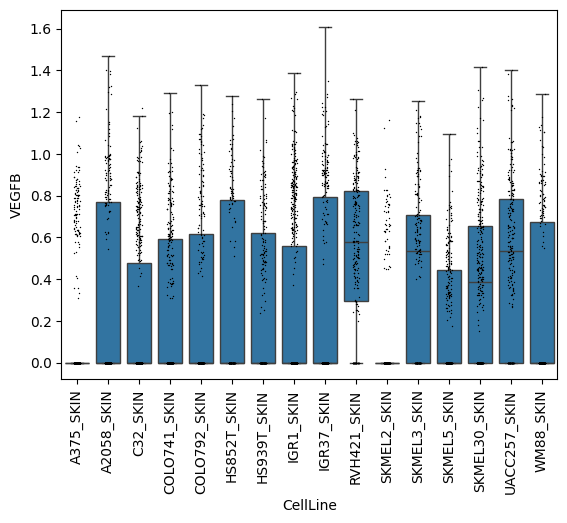

In [15]:
#VEGF-B expression vs skin cancer
adata_skin = adata[adata.obs.Indication=='Skin Cancer'].copy()
df = sc.get.obs_df(adata_skin, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_skin.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='VEGFB', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='VEGFB', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

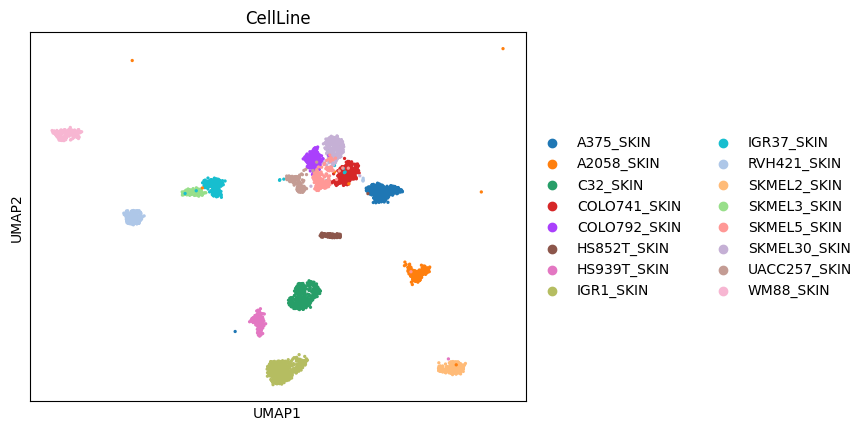

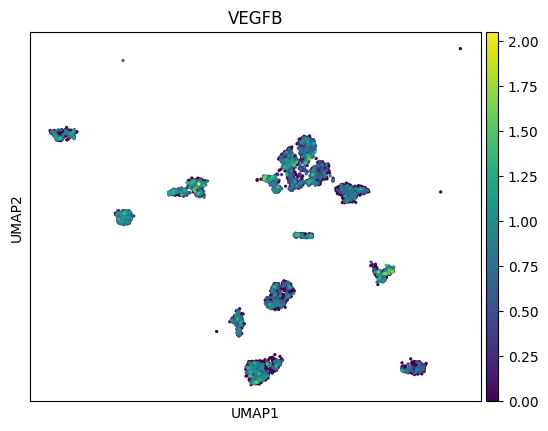

In [16]:
#UMAP visualization of skin cancer cells 
sc.pl.umap(adata_skin, color=['CellLine'])

#UMAP visualization of VEGFB expression in skin cancer cell lines 
sc.pl.umap(adata_skin, color=['VEGFB'])

In [17]:
#stats for VEGF-B expression in RVH421_SKIN
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Assuming 'df' is your DataFrame and 'adata' is your AnnData object

# Verify that the 'CellLine' values are correct
print("Unique cell lines:", df['CellLine'].unique())

# Check if 'RVH421_SKIN' is in the dataset
if 'RVH421_SKIN' not in df['CellLine'].unique():
    print("Cell line 'RVH421_SKIN' not found in the dataset.")
else:
    # Filter data for RVH421_SKIN and other cell lines
    df_target = df[df['CellLine'] == 'RVH421_SKIN'].copy()
    df_others = df[df['CellLine'] != 'RVH421_SKIN'].copy()

    # Check sample sizes
    print(f"Sample size for RVH421_SKIN: {len(df_target)}")
    print(f"Sample size for other cell lines: {len(df_others)}")

    # Check for NaNs in VEGFB
    print("NaNs in RVH421_SKIN VEGFB:", df_target['VEGFB'].isna().sum())
    print("NaNs in other cell lines VEGFB:", df_others['VEGFB'].isna().sum())

    # Ensure VEGFB is numeric
    print("Data type for RVH421_SKIN VEGFB:", df_target['VEGFB'].dtype)
    print("Data type for other cell lines VEGFB:", df_others['VEGFB'].dtype)

    # Drop NaNs if present
    df_target = df_target.dropna(subset=['VEGFB'])
    df_others = df_others.dropna(subset=['VEGFB'])

    # Perform statistical tests if sample sizes are sufficient
    if len(df_target) > 1 and len(df_others) > 1:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(df_target['VEGFB'], df_others['VEGFB'], equal_var=False)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Perform Mann-Whitney U test as a backup
        u_stat, p_value = stats.mannwhitneyu(df_target['VEGFB'], df_others['VEGFB'])
        print(f"U-statistic: {u_stat}, P-value: {p_value}")
    else:
        print("Sample sizes are insufficient for statistical testing.")

# Perform one-way ANOVA
    grouped_data = [df[df['CellLine'] == cell_line]['VEGFB'].dropna() for cell_line in df['CellLine'].unique()]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print(f"F-statistic: {f_stat}, P-value: {p_value}")
    
    if p_value < 0.05:
        print("Significant differences exist between the cell lines.")

        # Perform Tukey's HSD post-hoc test
        print("\nTukey's HSD Test:")
        tukey_result = pairwise_tukeyhsd(endog=df['VEGFB'], groups=df['CellLine'], alpha=0.05)
        print(tukey_result)
        
        # Specifically check for the difference involving 'RVH421_SKIN'
        print("\nTukey's HSD for 'RVH421_SKIN' vs. others:")
        specific_comparison = tukey_result.summary().data[1:]  # Exclude header
        for comp in specific_comparison:
            if 'RVH421_SKIN' in comp[0]:
                print(comp)
    else:
        print("No significant differences were found between the cell lines.")

# Specifically check for all comparisons involving 'RVH421_SKIN'
print("\nTukey's HSD for 'RVH421_SKIN' vs. all others:")

# Extract all pairwise comparisons
for comparison in tukey_result.summary().data[1:]:  # Skip the header row
    cell_line_1, cell_line_2 = comparison[0], comparison[1]
    
    # Check if either cell line in the pair is 'RVH421_SKIN'
    if 'RVH421_SKIN' in [cell_line_1, cell_line_2]:
        print(comparison)


Unique cell lines: ['C32_SKIN', 'COLO741_SKIN', 'WM88_SKIN', 'SKMEL2_SKIN', 'SKMEL3_SKIN', ..., 'RVH421_SKIN', 'HS939T_SKIN', 'COLO792_SKIN', 'SKMEL5_SKIN', 'UACC257_SKIN']
Length: 16
Categories (16, object): ['A375_SKIN', 'A2058_SKIN', 'C32_SKIN', 'COLO741_SKIN', ..., 'SKMEL5_SKIN', 'SKMEL30_SKIN', 'UACC257_SKIN', 'WM88_SKIN']
Sample size for RVH421_SKIN: 239
Sample size for other cell lines: 5112
NaNs in RVH421_SKIN VEGFB: 0
NaNs in other cell lines VEGFB: 0
Data type for RVH421_SKIN VEGFB: float64
Data type for other cell lines VEGFB: float64
T-statistic: 12.360497873803244, P-value: 5.1300513404974305e-28
U-statistic: 861955.5, P-value: 2.879276023199637e-35
F-statistic: 32.001042081154516, P-value: 1.4572831011412693e-88
Significant differences exist between the cell lines.

Tukey's HSD Test:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  A2058_SKIN    A375_SKIN  -0.1517    0.0   -0.24 -0.0634   True
  A2058_SKIN     C32_SKIN  -0.0993 0.0133 -0.1886   -0.01   True
  A2058_SKIN COLO741_SKIN  -0.0237    1.0 -0.1231  0.0756  False
  A2058_SKIN COLO792_SKIN  -0.0182    1.0 -0.1225   0.086  False
  A2058_SKIN  HS852T_SKIN    0.022    1.0 -0.0991  0.1431  False
  A2058_SKIN  HS939T_SKIN   0.0337 0.9996 -0.0745  0.1419  False
  A2058_SKIN    IGR1_SKIN  -0.0695 0.2794 -0.1551  0.0161  False
  A2058_SKIN   IGR37_SKIN   0.0037    1.0 -0.0944  0.1018  False
  A2058_SKIN  RVH421_SKIN   0.2498    0.0   0.142  0.3576   True
  A2058_SKIN  SKMEL2_SKIN  -0.1585    0.0 -0.2623 -0.0548   True
  A2058_SKIN SKMEL30_SKIN   0.0805 0.2564 -0.0173  0.1782  False
  A2058_SKIN  SKMEL3_SKIN   0.1447 0.0016  0.0302  0.2592   True
  A2058_SKIN  SKMEL5_SKIN

In [18]:
#stats for VEGF-B expression in SKMEL30_SKIN
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'df' is your DataFrame and 'adata' is your AnnData object

# Verify that the 'CellLine' values are correct
print("Unique cell lines:", df['CellLine'].unique())

# Check if 'SKMEL30_SKIN' is in the dataset
if 'SKMEL30_SKIN' not in df['CellLine'].unique():
    print("Cell line 'SKMEL30_SKIN' not found in the dataset.")
else:
    # Filter data for SKMEL30_SKIN and other cell lines
    df_target = df[df['CellLine'] == 'SKMEL30_SKIN'].copy()
    df_others = df[df['CellLine'] != 'SKMEL30_SKIN'].copy()

    # Check sample sizes
    print(f"Sample size for SKMEL30_SKIN: {len(df_target)}")
    print(f"Sample size for other cell lines: {len(df_others)}")

    # Check for NaNs in VEGFB
    print("NaNs in SKMEL30_SKIN VEGFB:", df_target['VEGFB'].isna().sum())
    print("NaNs in other cell lines VEGFB:", df_others['VEGFB'].isna().sum())

    # Ensure VEGFB is numeric
    print("Data type for SKMEL30_SKIN VEGFB:", df_target['VEGFB'].dtype)
    print("Data type for other cell lines VEGFB:", df_others['VEGFB'].dtype)

    # Drop NaNs if present
    df_target = df_target.dropna(subset=['VEGFB'])
    df_others = df_others.dropna(subset=['VEGFB'])

    # Perform statistical tests if sample sizes are sufficient
    if len(df_target) > 1 and len(df_others) > 1:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(df_target['VEGFB'], df_others['VEGFB'], equal_var=False)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Perform Mann-Whitney U test as a backup
        u_stat, p_value = stats.mannwhitneyu(df_target['VEGFB'], df_others['VEGFB'])
        print(f"U-statistic: {u_stat}, P-value: {p_value}")
    else:
        print("Sample sizes are insufficient for statistical testing.")

# Perform one-way ANOVA
    grouped_data = [df[df['CellLine'] == cell_line]['VEGFB'].dropna() for cell_line in df['CellLine'].unique()]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print(f"F-statistic: {f_stat}, P-value: {p_value}")
    
    if p_value < 0.05:
        print("Significant differences exist between the cell lines.")

        # Perform Tukey's HSD post-hoc test
        print("\nTukey's HSD Test:")
        tukey_result = pairwise_tukeyhsd(endog=df['VEGFB'], groups=df['CellLine'], alpha=0.05)
        print(tukey_result)
        
        # Specifically check for the difference involving 'RVH421_SKIN'
        print("\nTukey's HSD for 'SKMEL30_SKIN' vs. others:")
        specific_comparison = tukey_result.summary().data[1:]  # Exclude header
        for comp in specific_comparison:
            if 'SKMEL30_SKIN' in comp[0]:
                print(comp)
    else:
        print("No significant differences were found between the cell lines.")

# Specifically check for all comparisons involving 'SKMEL30_SKIN'
print("\nTukey's HSD for 'SKMEL30_SKIN' vs. all others:")

# Extract all pairwise comparisons
for comparison in tukey_result.summary().data[1:]:  # Skip the header row
    cell_line_1, cell_line_2 = comparison[0], comparison[1]
    
    # Check if either cell line in the pair is 'SKMEL30_SKIN'
    if 'SKMEL30_SKIN' in [cell_line_1, cell_line_2]:
        print(comparison)


Unique cell lines: ['C32_SKIN', 'COLO741_SKIN', 'WM88_SKIN', 'SKMEL2_SKIN', 'SKMEL3_SKIN', ..., 'RVH421_SKIN', 'HS939T_SKIN', 'COLO792_SKIN', 'SKMEL5_SKIN', 'UACC257_SKIN']
Length: 16
Categories (16, object): ['A375_SKIN', 'A2058_SKIN', 'C32_SKIN', 'COLO741_SKIN', ..., 'SKMEL5_SKIN', 'SKMEL30_SKIN', 'UACC257_SKIN', 'WM88_SKIN']
Sample size for SKMEL30_SKIN: 353
Sample size for other cell lines: 4998
NaNs in SKMEL30_SKIN VEGFB: 0
NaNs in other cell lines VEGFB: 0
Data type for SKMEL30_SKIN VEGFB: float64
Data type for other cell lines VEGFB: float64
T-statistic: 5.41154662592553, P-value: 1.0665531817004324e-07
U-statistic: 1037089.5, P-value: 1.965519193574469e-10
F-statistic: 32.001042081154516, P-value: 1.4572831011412693e-88
Significant differences exist between the cell lines.

Tukey's HSD Test:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  A2058_SKIN    A375_SKIN  -0.1517    0.0   -0.24 -0.0634   True
  A2058_SKIN     C32_SKIN  -0.0993 0.0133 -0.1886   -0.01   True
  A2058_SKIN COLO741_SKIN  -0.0237    1.0 -0.1231  0.0756  False
  A2058_SKIN COLO792_SKIN  -0.0182    1.0 -0.1225   0.086  False
  A2058_SKIN  HS852T_SKIN    0.022    1.0 -0.0991  0.1431  False
  A2058_SKIN  HS939T_SKIN   0.0337 0.9996 -0.0745  0.1419  False
  A2058_SKIN    IGR1_SKIN  -0.0695 0.2794 -0.1551  0.0161  False
  A2058_SKIN   IGR37_SKIN   0.0037    1.0 -0.0944  0.1018  False
  A2058_SKIN  RVH421_SKIN   0.2498    0.0   0.142  0.3576   True
  A2058_SKIN  SKMEL2_SKIN  -0.1585    0.0 -0.2623 -0.0548   True
  A2058_SKIN SKMEL30_SKIN   0.0805 0.2564 -0.0173  0.1782  False
  A2058_SKIN  SKMEL3_SKIN   0.1447 0.0016  0.0302  0.2592   True
  A2058_SKIN  SKMEL5_SKIN

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'A375_SKIN'),
  Text(1, 0, 'A2058_SKIN'),
  Text(2, 0, 'C32_SKIN'),
  Text(3, 0, 'COLO741_SKIN'),
  Text(4, 0, 'COLO792_SKIN'),
  Text(5, 0, 'HS852T_SKIN'),
  Text(6, 0, 'HS939T_SKIN'),
  Text(7, 0, 'IGR1_SKIN'),
  Text(8, 0, 'IGR37_SKIN'),
  Text(9, 0, 'RVH421_SKIN'),
  Text(10, 0, 'SKMEL2_SKIN'),
  Text(11, 0, 'SKMEL3_SKIN'),
  Text(12, 0, 'SKMEL5_SKIN'),
  Text(13, 0, 'SKMEL30_SKIN'),
  Text(14, 0, 'UACC257_SKIN'),
  Text(15, 0, 'WM88_SKIN')])

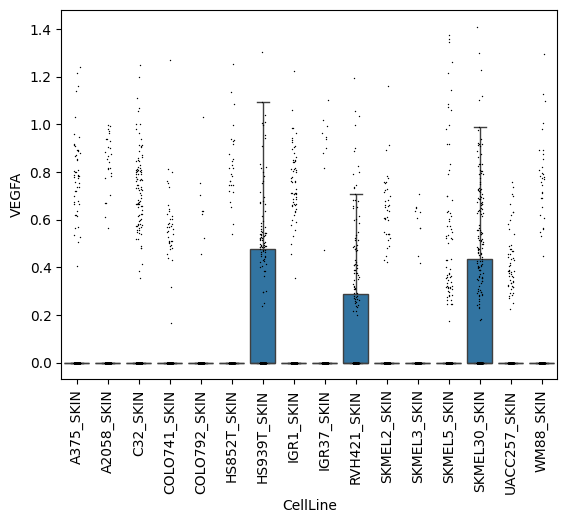

In [ ]:
#VEGF-A expression vs skin cancer
adata_skin = adata[adata.obs.Indication=='Skin Cancer'].copy()
df = sc.get.obs_df(adata_skin, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_skin.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='VEGFA', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='VEGFA', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

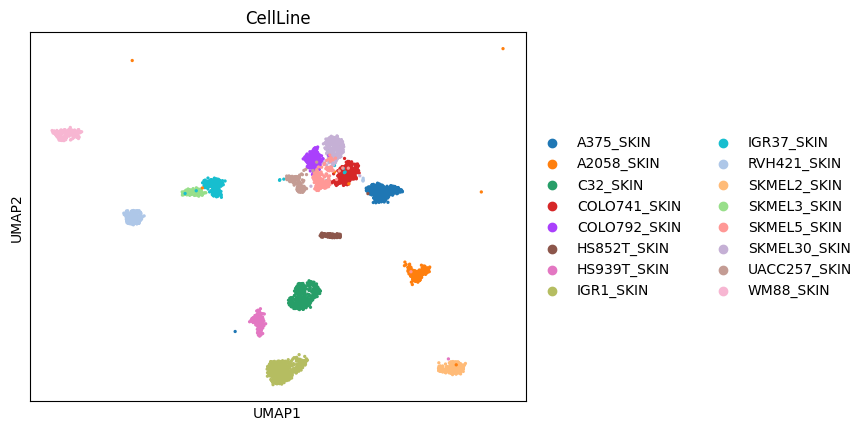

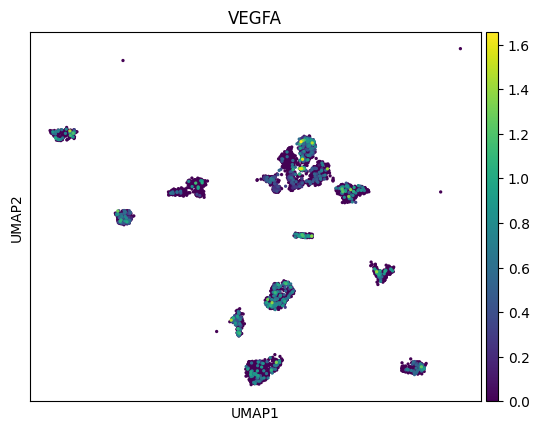

In [19]:
#UMAP visualization of skin cancer cells 
sc.pl.umap(adata_skin, color=['CellLine'])

#UMAP visualization of VEGFA expression in skin cancer cell lines 
sc.pl.umap(adata_skin, color=['VEGFA'])

In [20]:
#stats for VEGF-A expression in RVH421_SKIN
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Assuming 'df' is your DataFrame and 'adata' is your AnnData object

# Verify that the 'CellLine' values are correct
print("Unique cell lines:", df['CellLine'].unique())

# Check if 'RVH421_SKIN' is in the dataset
if 'RVH421_SKIN' not in df['CellLine'].unique():
    print("Cell line 'RVH421_SKIN' not found in the dataset.")
else:
    # Filter data for RVH421_SKIN and other cell lines
    df_target = df[df['CellLine'] == 'RVH421_SKIN'].copy()
    df_others = df[df['CellLine'] != 'RVH421_SKIN'].copy()

    # Check sample sizes
    print(f"Sample size for RVH421_SKIN: {len(df_target)}")
    print(f"Sample size for other cell lines: {len(df_others)}")

    # Check for NaNs in VEGFA
    print("NaNs in RVH421_SKIN VEGFA:", df_target['VEGFA'].isna().sum())
    print("NaNs in other cell lines VEGFA:", df_others['VEGFA'].isna().sum())

    # Ensure VEGFB is numeric
    print("Data type for RVH421_SKIN VEGFA:", df_target['VEGFA'].dtype)
    print("Data type for other cell lines VEGFA:", df_others['VEGFA'].dtype)

    # Drop NaNs if present
    df_target = df_target.dropna(subset=['VEGFA'])
    df_others = df_others.dropna(subset=['VEGFA'])

    # Perform statistical tests if sample sizes are sufficient
    if len(df_target) > 1 and len(df_others) > 1:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(df_target['VEGFA'], df_others['VEGFA'], equal_var=False)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Perform Mann-Whitney U test as a backup
        u_stat, p_value = stats.mannwhitneyu(df_target['VEGFA'], df_others['VEGFA'])
        print(f"U-statistic: {u_stat}, P-value: {p_value}")
    else:
        print("Sample sizes are insufficient for statistical testing.")

# Perform one-way ANOVA
    grouped_data = [df[df['CellLine'] == cell_line]['VEGFA'].dropna() for cell_line in df['CellLine'].unique()]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print(f"F-statistic: {f_stat}, P-value: {p_value}")
    
    if p_value < 0.05:
        print("Significant differences exist between the cell lines.")

        # Perform Tukey's HSD post-hoc test
        print("\nTukey's HSD Test:")
        tukey_result = pairwise_tukeyhsd(endog=df['VEGFA'], groups=df['CellLine'], alpha=0.05)
        print(tukey_result)
        
        # Specifically check for the difference involving 'RVH421_SKIN'
        print("\nTukey's HSD for 'RVH421_SKIN' vs. others:")
        specific_comparison = tukey_result.summary().data[1:]  # Exclude header
        for comp in specific_comparison:
            if 'RVH421_SKIN' in comp[0]:
                print(comp)
    else:
        print("No significant differences were found between the cell lines.")

# Specifically check for all comparisons involving 'RVH421_SKIN'
print("\nTukey's HSD for 'RVH421_SKIN' vs. all others:")

# Extract all pairwise comparisons
for comparison in tukey_result.summary().data[1:]:  # Skip the header row
    cell_line_1, cell_line_2 = comparison[0], comparison[1]
    
    # Check if either cell line in the pair is 'RVH421_SKIN'
    if 'RVH421_SKIN' in [cell_line_1, cell_line_2]:
        print(comparison)



Unique cell lines: ['C32_SKIN', 'COLO741_SKIN', 'WM88_SKIN', 'SKMEL2_SKIN', 'SKMEL3_SKIN', ..., 'RVH421_SKIN', 'HS939T_SKIN', 'COLO792_SKIN', 'SKMEL5_SKIN', 'UACC257_SKIN']
Length: 16
Categories (16, object): ['A375_SKIN', 'A2058_SKIN', 'C32_SKIN', 'COLO741_SKIN', ..., 'SKMEL5_SKIN', 'SKMEL30_SKIN', 'UACC257_SKIN', 'WM88_SKIN']
Sample size for RVH421_SKIN: 239
Sample size for other cell lines: 5112
NaNs in RVH421_SKIN VEGFA: 0
NaNs in other cell lines VEGFA: 0
Data type for RVH421_SKIN VEGFA: float64
Data type for other cell lines VEGFA: float64
T-statistic: 3.5797214104607558, P-value: 0.0004108584616311083
U-statistic: 705722.5, P-value: 7.095043826611918e-11
F-statistic: 18.699431004336617, P-value: 1.5907772035818187e-49
Significant differences exist between the cell lines.

Tukey's HSD Test:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  A2058_SKIN    A375_SKIN   -0.009    1.0 -0.0675  0.0495  False
  A2058_SKIN     C32_SKIN   0.0527 0.1487 -0.0065  0.1118  False
  A2058_SKIN COLO741_SKIN  -0.0075    1.0 -0.0733  0.0583  False
  A2058_SKIN COLO792_SKIN  -0.0546 0.3253 -0.1236  0.0145  False
  A2058_SKIN  HS852T_SKIN   0.0642 0.3036  -0.016  0.1445  False
  A2058_SKIN  HS939T_SKIN   0.1294    0.0  0.0577  0.2011   True
  A2058_SKIN    IGR1_SKIN  -0.0128    1.0 -0.0695  0.0439  False
  A2058_SKIN   IGR37_SKIN  -0.0483 0.4361 -0.1133  0.0167  False
  A2058_SKIN  RVH421_SKIN   0.0805  0.011   0.009  0.1519   True
  A2058_SKIN  SKMEL2_SKIN   0.0125    1.0 -0.0562  0.0813  False
  A2058_SKIN SKMEL30_SKIN   0.1438    0.0  0.0791  0.2086   True
  A2058_SKIN  SKMEL3_SKIN   -0.044 0.8311 -0.1199  0.0318  False
  A2058_SKIN  SKMEL5_SKIN

In [21]:
#stats for VEGF-A expression in SKMEL30_SKIN
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Assuming 'df' is your DataFrame and 'adata' is your AnnData object

# Verify that the 'CellLine' values are correct
print("Unique cell lines:", df['CellLine'].unique())

# Check if 'SKMEL30_SKIN' is in the dataset
if 'SKMEL30_SKIN' not in df['CellLine'].unique():
    print("Cell line 'SKMEL30_SKIN' not found in the dataset.")
else:
    # Filter data for SKMEL30_SKIN and other cell lines
    df_target = df[df['CellLine'] == 'SKMEL30_SKIN'].copy()
    df_others = df[df['CellLine'] != 'SKMEL30_SKIN'].copy()

    # Check sample sizes
    print(f"Sample size for SKMEL30_SKIN: {len(df_target)}")
    print(f"Sample size for other cell lines: {len(df_others)}")

    # Check for NaNs in VEGFA
    print("NaNs in SKMEL30_SKIN VEGFA:", df_target['VEGFA'].isna().sum())
    print("NaNs in other cell lines VEGFA:", df_others['VEGFA'].isna().sum())

    # Ensure VEGFB is numeric
    print("Data type for SKMEL30_SKIN VEGFA:", df_target['VEGFA'].dtype)
    print("Data type for other cell lines VEGFA:", df_others['VEGFA'].dtype)

    # Drop NaNs if present
    df_target = df_target.dropna(subset=['VEGFA'])
    df_others = df_others.dropna(subset=['VEGFA'])

    # Perform statistical tests if sample sizes are sufficient
    if len(df_target) > 1 and len(df_others) > 1:
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(df_target['VEGFA'], df_others['VEGFA'], equal_var=False)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")

        # Perform Mann-Whitney U test as a backup
        u_stat, p_value = stats.mannwhitneyu(df_target['VEGFA'], df_others['VEGFA'])
        print(f"U-statistic: {u_stat}, P-value: {p_value}")
    else:
        print("Sample sizes are insufficient for statistical testing.")

# Perform one-way ANOVA
    grouped_data = [df[df['CellLine'] == cell_line]['VEGFA'].dropna() for cell_line in df['CellLine'].unique()]
    f_stat, p_value = stats.f_oneway(*grouped_data)
    print(f"F-statistic: {f_stat}, P-value: {p_value}")
    
    if p_value < 0.05:
        print("Significant differences exist between the cell lines.")

        # Perform Tukey's HSD post-hoc test
        print("\nTukey's HSD Test:")
        tukey_result = pairwise_tukeyhsd(endog=df['VEGFA'], groups=df['CellLine'], alpha=0.05)
        print(tukey_result)
        
        # Specifically check for the difference involving 'SKMEL30_SKIN'
        print("\nTukey's HSD for 'RVH421_SKIN' vs. others:")
        specific_comparison = tukey_result.summary().data[1:]  # Exclude header
        for comp in specific_comparison:
            if 'SKMEL30_SKIN' in comp[0]:
                print(comp)
    else:
        print("No significant differences were found between the cell lines.")

# Specifically check for all comparisons involving 'SKMEL30_SKIN'
print("\nTukey's HSD for 'SKMEL30_SKIN' vs. all others:")

# Extract all pairwise comparisons
for comparison in tukey_result.summary().data[1:]:  # Skip the header row
    cell_line_1, cell_line_2 = comparison[0], comparison[1]
    
    # Check if either cell line in the pair is 'SKMEL30_SKIN'
    if 'SKMEL30_SKIN' in [cell_line_1, cell_line_2]:
        print(comparison)

Unique cell lines: ['C32_SKIN', 'COLO741_SKIN', 'WM88_SKIN', 'SKMEL2_SKIN', 'SKMEL3_SKIN', ..., 'RVH421_SKIN', 'HS939T_SKIN', 'COLO792_SKIN', 'SKMEL5_SKIN', 'UACC257_SKIN']
Length: 16
Categories (16, object): ['A375_SKIN', 'A2058_SKIN', 'C32_SKIN', 'COLO741_SKIN', ..., 'SKMEL5_SKIN', 'SKMEL30_SKIN', 'UACC257_SKIN', 'WM88_SKIN']
Sample size for SKMEL30_SKIN: 353
Sample size for other cell lines: 4998
NaNs in SKMEL30_SKIN VEGFA: 0
NaNs in other cell lines VEGFA: 0
Data type for SKMEL30_SKIN VEGFA: float64
Data type for other cell lines VEGFA: float64
T-statistic: 7.6378453935957245, P-value: 1.8056021155234385e-13
U-statistic: 1089108.5, P-value: 2.4884499405984974e-32
F-statistic: 18.699431004336617, P-value: 1.5907772035818187e-49
Significant differences exist between the cell lines.

Tukey's HSD Test:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  A2058_SKIN    A375_SKIN   -0.009    1.0 -0.0675  0.0495  False
  A2058_SKIN     C32_SKIN   0.0527 0.1487 -0.0065  0.1118  False
  A2058_SKIN COLO741_SKIN  -0.0075    1.0 -0.0733  0.0583  False
  A2058_SKIN COLO792_SKIN  -0.0546 0.3253 -0.1236  0.0145  False
  A2058_SKIN  HS852T_SKIN   0.0642 0.3036  -0.016  0.1445  False
  A2058_SKIN  HS939T_SKIN   0.1294    0.0  0.0577  0.2011   True
  A2058_SKIN    IGR1_SKIN  -0.0128    1.0 -0.0695  0.0439  False
  A2058_SKIN   IGR37_SKIN  -0.0483 0.4361 -0.1133  0.0167  False
  A2058_SKIN  RVH421_SKIN   0.0805  0.011   0.009  0.1519   True
  A2058_SKIN  SKMEL2_SKIN   0.0125    1.0 -0.0562  0.0813  False
  A2058_SKIN SKMEL30_SKIN   0.1438    0.0  0.0791  0.2086   True
  A2058_SKIN  SKMEL3_SKIN   -0.044 0.8311 -0.1199  0.0318  False
  A2058_SKIN  SKMEL5_SKIN